In [1]:
from pycaret.datasets import get_data

In [3]:
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1

In [4]:
from pycaret.regression import *

In [5]:
s = setup(data, target = 'charges', session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4165.9659,3.330203e+07,5770.7909,0.8011,0.4683,0.4153
1,4503.7366,4.374648e+07,6614.1122,0.7456,0.5633,0.4217
2,3880.5528,3.179514e+07,5638.7179,0.5974,0.7645,0.4396
3,3747.6457,2.680530e+07,5177.3833,0.7762,0.5015,0.5175
4,4471.0419,4.341053e+07,6588.6670,0.6771,0.5224,0.3767
5,4182.7551,3.616633e+07,6013.8450,0.7674,0.7416,0.4320
6,4081.1022,3.919259e+07,6260.3984,0.7333,0.6434,0.4241
7,4928.1534,4.641504e+07,6812.8581,0.7448,0.5887,0.4137
8,4609.3147,4.037035e+07,6353.7670,0.7392,0.5686,0.5111
9,4665.8647,4.259679e+07,6526.6220,0.7256,0.8131,0.4802


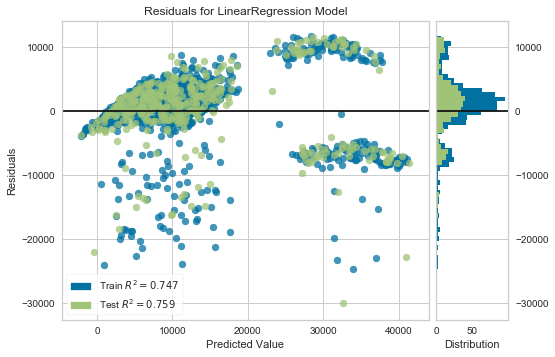

In [7]:
plot_model(lr)

# Experiment 2

In [8]:
s2 = setup(data, target = 'charges', session_id=123,
          normalize=True,
          polynomial_features= True , trigonometry_features= True , feature_interaction=True,
          bin_numeric_features= ['age','bmi'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [9]:
s2[0].columns

Index(['bmi_Power2', 'age_Power2', 'sex_male', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_0.0', 'age_1.0', 'age_10.0', 'age_11.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'age_7.0',
       'age_8.0', 'age_9.0', 'bmi_0.0', 'bmi_1.0', 'bmi_10.0', 'bmi_11.0',
       'bmi_2.0', 'bmi_3.0', 'bmi_4.0', 'bmi_5.0', 'bmi_6.0', 'bmi_7.0',
       'bmi_8.0', 'bmi_9.0', 'smoker_yes_multiply_age_Power2',
       'region_northeast_multiply_bmi_Power2',
       'smoker_yes_multiply_bmi_Power2', 'bmi_Power2_multiply_sex_male',
       'sex_male_multiply_bmi_Power2', 'age_Power2_multiply_smoker_yes',
       'sex_male_multiply_age_Power2', 'region_southwest_multiply_age_Power2',
       'region_southeast_multiply_smoker_yes',
       'smoker_yes_multiply_children_0', 'bmi_Power2_multiply_age_Power2',
       'children_2_multiply_bm

In [10]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2979.6436,2.125891e+07,4610.7389,0.8730,0.4154,0.3352
1,3578.9154,3.444866e+07,5869.2979,0.7997,0.4696,0.3624
2,2888.1508,2.214053e+07,4705.3723,0.7197,0.5025,0.3813
3,3153.5002,2.446554e+07,4946.2652,0.7957,0.5416,0.4493
4,3271.5782,2.815363e+07,5305.9997,0.7906,0.4759,0.3150
5,3218.6809,2.289290e+07,4784.6527,0.8527,0.3727,0.2969
6,2810.8097,2.416530e+07,4915.8210,0.8356,0.3912,0.3170
7,3336.4281,2.836631e+07,5326.0036,0.8440,0.4870,0.3295
8,3021.3967,2.134473e+07,4620.0360,0.8621,0.3833,0.3347
9,3155.4432,2.852513e+07,5340.8922,0.8163,0.4924,0.3348


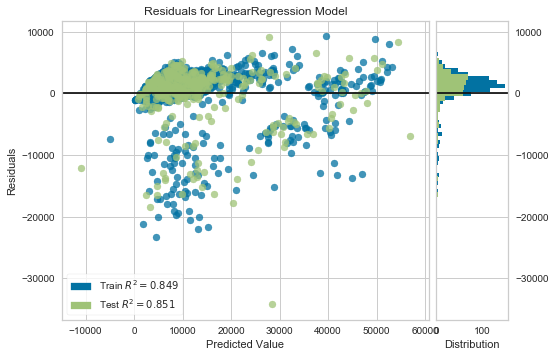

In [11]:
plot_model(lr)

In [12]:
save_model(lr, 'deployment_02052020')

Transformation Pipeline and Model Succesfully Saved


In [14]:
deployment_02052020 = load_model('deployment_02052020')

Transformation Pipeline and Model Sucessfully Loaded


In [15]:
deployment_02052020

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels...
                 ('dummy', Dummify(target='charges')),
                 ('fix_perfect', Remove_100(target='charges')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
                  DFS_Classic(interactions

In [ ]:

import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())
